In [66]:
RD=[[],[],[]]
for n in range(3):
    # read only 100 points in each gorup
    with open(f"./Group16/rd_Group16/Class{n+1}.txt",'r') as rd:
        points=0
        for i in rd.readlines():
            points+=1
            a,b = i.split(" ")[0:2];
            a,b = float(a), float(b)
            # if(points<100):
            RD[n].append([a,b])

In [67]:
from matplotlib import  pyplot as plt

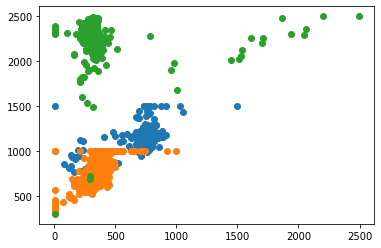

In [68]:
for cls in RD:
    plt.scatter([i[0] for i in cls],[i[1] for i in cls])

In [69]:
for i in RD:
    print(len(i))

2164
2488
2388


In [79]:
from model import *
from utils import *
import random

import numpy as np
import matplotlib.pyplot as plt
from utils import *
from scipy.stats import multivariate_normal
multivariate_normal_pdf = multivariate_normal.pdf
# from ConfusionMatrix import *

def grid_points(classes_data_to_show=[]):
    
        x_min = min([min([i[0] for i in cls]) for cls in classes_data_to_show])

        y_min = min([min([i[1] for i in cls]) for cls in classes_data_to_show])

        x_max = max([max([i[0] for i in cls]) for cls in classes_data_to_show])

        y_max = max([max([i[1] for i in cls]) for cls in classes_data_to_show])

        space_percentage = 10
        x_range = x_max - x_min
        y_range = y_max - y_min
        x_padding = (x_range * space_percentage) / 100.0
        y_padding = (y_range * space_percentage) / 100.0

        x_min -= x_padding
        x_max += x_padding

        y_min -= y_padding
        y_max += y_padding
        
        if len(classes_data_to_show) == 0:
            x_min = 0
            y_min = 0
            x_max = 10
            y_max = 10
        
        return np.meshgrid(
            np.linspace(x_min, x_max,GRID_SIZE), np.linspace(y_min, y_max, GRID_SIZE)
        )

class confusion_matrix:
    def __init__(self, matrix=[]):
        self.matrix = matrix

    def print(self):
        print("confusion matrix: ")
        print(self.matrix)

        print("accuracy: ", self.accuracy())

        print("precision: ", self.precision())

        print("recall: ", self.recall())

        print("f1_score: ", self.f1_score())

    def fill(self, actual, predicted):
        self.matrix[actual][predicted] += 1

    # assuming the matrix is n*n

    def accuracy(self):
        total = 0

        correct = 0

        for i in range(len(self.matrix)):
            for j in range(len(self.matrix)):
                total += self.matrix[i][j]

                if i == j:
                    correct += self.matrix[i][j]

        return correct / total

    def precision(self):
        precision = []

        for i in range(len(self.matrix)):
            tp = self.matrix[i][i]

            fp = 0

            for j in range(len(self.matrix)):
                if i != j:
                    fp += self.matrix[j][i]

            precision.append(tp / (tp + fp))

        return precision

    def recall(self):
        recall = []

        for i in range(len(self.matrix)):
            tp = self.matrix[i][i]

            fn = 0

            for j in range(len(self.matrix)):
                if i != j:
                    fn += self.matrix[i][j]

            recall.append(tp / (tp + fn))

        return recall

    def f1_score(self):
        precision = self.precision()
        recall = self.recall()

        f1_score = []

        for i in range(len(self.matrix)):
            f1_score.append(2 * precision[i] * recall[i] / (precision[i] + recall[i]))

        return f1_score
    
class Cluster_representation:
    def __init__(self,mean=[],covariance=[],weight=0):
        self.mean=mean
        self.covariance=covariance
        self.weight=weight

# class class_representation:
#     def __init__(self, k=1):
#         self.clusters = []
#         self.prior = 1
#         self.num_of_clusters = k

#     def point_probability_for_cluster(self, point, cluster):
#         total_probability = 0
#         for i in range(self.num_of_clusters):
#             total_probability += self.clusters[i].weight * multivariate_normal_pdf(
#                 point, self.clusters[i].mean, self.clusters[i].covariance)
#         if total_probability < 1e-10:
#             return 0
#         return (self.clusters[cluster].weight * multivariate_normal_pdf(
#             point, self.clusters[cluster].mean, self.clusters[cluster].covariance)) / total_probability

#     def fit(self, data):
        
#         # Initializing cluster centers
#         centers = set()
#         while len(centers) < self.num_of_clusters:
#             centers.add(random.randint(0, len(data) - 1))
#         centers = list(centers)
#         self.clusters = [Cluster_representation(data[centers[i]], np.identity(len(data[0])), 1 / self.num_of_clusters) for i in range(self.num_of_clusters)]

#         data = np.array(data)

#         iteration_no=0
#         while True:
#             print("iteration no.",iteration_no,"MEANS : ",[i.mean for i in self.clusters])
#             iteration_no+=1
            
            
            
            
#             # Expectation and Maximization steps
#             new_clusters = [Cluster_representation() for _ in range(self.num_of_clusters)]
#             for i in range(self.num_of_clusters):
#                 new_clusters[i].mean = np.zeros(len(data[0]))
#                 new_clusters[i].covariance = np.zeros((len(data[0]), len(data[0])))
#                 new_clusters[i].weight = 0
                
            

#             for i in range(len(data)):
#                 for j in range(self.num_of_clusters):
#                     probability = self.point_probability_for_cluster(data[i], j)
#                     # print(probability*data[i], "dkdk",new_clusters[j].mean)
#                     new_clusters[j].mean += probability * data[i]

#             for j in range(self.num_of_clusters):
#                 new_clusters[j].covariance = np.identity(len(data[0]))  # Initialize covariance as identity

#             Effective_num_of_points = [0 for _ in range(self.num_of_clusters)]
#             for i in range(len(data)):
#                 for j in range(self.num_of_clusters):
#                     new_clusters[j].covariance += self.point_probability_for_cluster(data[i], j) * np.outer(data[i] - new_clusters[j].mean, data[i] - new_clusters[j].mean)
#                     Effective_num_of_points[j] += self.point_probability_for_cluster(data[i], j)

#             for i in range(self.num_of_clusters):
#                 new_clusters[i].mean /= Effective_num_of_points[i]
#                 new_clusters[i].covariance /= Effective_num_of_points[i]
#                 new_clusters[i].weight = Effective_num_of_points[i] / len(data)

#             # Check for convergence using an appropriate criterion
#             converged = True
#             for i in range(self.num_of_clusters):
#                 if np.linalg.norm(new_clusters[i].mean - self.clusters[i].mean) > 0.01:
#                     converged = False
#                     break

#             if converged:
#                 break

#         # Set the clusters to the new clusters after convergence
#         self.clusters = new_clusters
        

class class_representation:
    def __init__(self,k=1):
        self.clusters=[]
        self.prior=1
        self.num_of_clusters=k
        
    def point_probability_for_cluster(self,point,cluster):
        # print(self.num_of_clusters)
        # print(self.clusters)
        total_probability=0
        for i in range(self.num_of_clusters):
            # also handle singular matrix error
            if(np.linalg.det(self.clusters[i].covariance)==0):
                return 0
            total_probability+=self.clusters[i].weight*multivariate_normal_pdf(point,self.clusters[i].mean,self.clusters[i].covariance,allow_singular=True)
        # print("Total Probability :",total_probability,)
        if(total_probability==0):
            return 0
        return (self.clusters[cluster].weight*multivariate_normal_pdf(point,self.clusters[cluster].mean,self.clusters[cluster].covariance))/total_probability
    
    def fit(self,data):
        # initilizing cluster centers
        centers=set()
        while len(centers)<self.num_of_clusters:
            centers.add(random.randint(0,len(data)-1))
        centers=list(centers)
        self.clusters = [Cluster_representation(data[centers[i]], np.identity(len(data[0])), 1 / self.num_of_clusters) for i in range(self.num_of_clusters)]
        
        
        data=np.array(data)
        
        iteration_no=0
        while True:
            iteration_no+=1
            print(iteration_no)
            print([i.mean for i in self.clusters])
            # expecation and maximization steps
            new_clusters = [Cluster_representation() for i in range(self.num_of_clusters)]
            # calculating the mean of each cluster
            sums=[np.zeros(data[0].shape) for i in range(self.num_of_clusters)]
            Effective_num_of_points=[0 for i in range(self.num_of_clusters)]
            for i in range(len(data)):
                for j in range(self.num_of_clusters):
                    sums[j]+=self.point_probability_for_cluster(data[i],j)*data[i]
                    Effective_num_of_points[j]+=self.point_probability_for_cluster(data[i],j)
            for i in range(self.num_of_clusters):
                new_clusters[i].mean=sums[i]/Effective_num_of_points[i]
            
            # calculating the covariance of each cluster
            for i in range(self.num_of_clusters):
                sums[i]=np.zeros((len(data[0]),len(data[0])))
            for i in range(len(data)):
                for j in range(self.num_of_clusters):
                    sums[j]+=self.point_probability_for_cluster(data[i],j)*np.outer(data[i]-new_clusters[j].mean,data[i]-new_clusters[j].mean)
            for i in range(self.num_of_clusters):
                new_clusters[i].covariance=sums[i]/Effective_num_of_points[i]
                
                
            # calculating the weight of each cluster
            for i in range(self.num_of_clusters):
                new_clusters[i].weight=Effective_num_of_points[i]/len(data)
                
            # checking for convergence
            converged=True
            for i in range(self.num_of_clusters):
                percentage_change = abs((new_clusters[i].mean - self.clusters[i].mean) / self.clusters[i].mean) * 100
                print("percentage change in mean :",percentage_change)
                if (percentage_change > 0.1).any():
                    converged = False
                    break
            
            if converged:
                break   
            else:
                self.clusters=new_clusters
            
        

class Bayes_Classifier_GMM:
    def __init__(self):
        self.classes=[]
        self.num_of_classes=0
        
    def train(self,classes_train_data):
        self.num_of_classes=len(classes_train_data)
        for i in range(self.num_of_classes):
            self.classes.append(class_representation(3))
            self.classes[i].fit(classes_train_data[i])
            
    def predict(self,vector):
        max_probability=0
        which_class=0
        for i in range(self.num_of_classes):
            probability=0
            for j in range(self.classes[i].num_of_clusters):
                if(np.linalg.det(self.classes[i].clusters[j].covariance)==0):
                    continue
                probability+=self.classes[i].clusters[j].weight*multivariate_normal_pdf(vector,self.classes[i].clusters[j].mean,self.classes[i].clusters[j].covariance)
            if probability>max_probability:
                max_probability=probability
                which_class=i
        return which_class
    
    def test(self,classes_test_data):
        confusion=confusion_matrix(np.zeros((self.num_of_classes,self.num_of_classes)))
        
        for i in range(len(classes_test_data)):
            for point in classes_test_data[i]:
                predicted = self.predict(point)
                confusion.fill(i, predicted)
        
        return confusion
    
    def plot_decision_regions_2d(self,title,classes_data_to_show=[],saveOnly=False):
        xx,yy = grid_points(classes_data_to_show)
        
        Grid_Points = np.c_[xx.ravel(), yy.ravel()]

        # Predict class labels for the grid points using classifier

        predictions = np.array([self.predict(point) for point in Grid_Points])

        predictions = predictions.reshape(xx.shape)

        # Create a contour plot for decision regions

        plt.contourf(xx, yy, predictions, cmap=plt.cm.RdYlBu, alpha=0.7)

        # Scatter plot for the training data points

        n=0
        for cls in classes_data_to_show:
            plt.scatter(
                [i[0] for i in cls],
                [i[1] for i in cls],
                label="Class " + str(classes_data_to_show.index(cls) + 1),
            )
            n+=1

        plt.xlabel("Feature 1")

        plt.ylabel("Feature 2")

        plt.title("Decision Regions for " + title)

        plt.legend()

        if(saveOnly==False):
            plt.show()
        
        plt.savefig(f"Images\Decision Regions for {title}")
        
        plt.close()

    def plot_contour(self,title,classes_data_to_show=[],saveOnly=False):
        
        # plot each class data points
        for cls in classes_data_to_show:
            plt.scatter(
                [i[0] for i in cls],
                [i[1] for i in cls],
                label="Class " + str(classes_data_to_show.index(cls) + 1),
            )
            
        # plot mean of each cluster
        c_no=0
        for cls in self.classes:
            c_no+=1
            cl_no=0
            for cluster in cls.clusters:
                cl_no+=1
                plt.scatter(cluster.mean[0],cluster.mean[1],label="mean for class "+ str(c_no)+" cluster "+str(cl_no),marker="x",color="black")
                
        # plot countour for each cluster
        xx, yy = grid_points(classes_data_to_show)
        
        for cls in self.classes:
            for cluster in cls.clusters:
                pdf=np.zeros((GRID_SIZE,GRID_SIZE))
                for i in range(GRID_SIZE):
                    for j in range(GRID_SIZE):
                        pdf[i][j]=multivariate_normal_pdf([xx[i][j],yy[i][j]],cluster.mean,cluster.covariance,allow_singular=True)
                plt.contour(xx,yy,pdf,levels=3,colors='k',alpha=0.7)
        
        plt.gca().set_aspect('equal', adjustable='box')
        
        plt.xlabel("Feature 1")

        plt.ylabel("Feature 2")

        plt.title("Coutour plot for " + title)

        plt.legend()

        if(saveOnly==False):
            plt.show()
        
        plt.savefig(f"Images\Countour plot for {title}")
        
        plt.close()
            

def all_setps(DataForEachClass,title,saveOnly=False):
    # splitting the data into train data and test data
    TrainData = []
    TestData = []
    for cls in DataForEachClass:
        Train, Test = SplitList(cls, 0.7)
        TrainData.append(Train)
        TestData.append(Test)
        
    # creating models

    model=Bayes_Classifier_GMM()

    # train models
    model.train(TrainData)


    m = 0
    m += 1
    n = 0
    print("\nfor case ", m)
    for i in model.classes:
        n += 1
        print("Class", n)
        print("Mean:\n", i.mean)
        print("Covariance:\n", i.covariance)
        print("Prior:\n", i.prior)
        print("")
            
    # test model
    n = 0
    n += 1
    print("\nfor case ", n)
    confusion = model.test(TestData)
    confusion.print()
        
    # plot decion regions
    case = 0
    case+=1
    model.plot_decision_regions_2d(f"{title} for {case}",TrainData,saveOnly=saveOnly)

In [71]:
print(len(RD))

3


In [72]:
# splitting the data into train data and test data
TrainData = []
TestData = []
for cls in RD:
    Train, Test = SplitList(cls, 0.7)
    TrainData.append(Train)
    TestData.append(Test)
    

In [73]:
model=Bayes_Classifier_GMM()

In [74]:
model.train(TrainData)

1
[[730.46875, 1085.9375], [753.90625, 1289.0625], [753.90625, 1128.90625]]
percentage change in mean : [0.23090137 0.14986576]
2
[array([ 728.78208763, 1084.31005155]), array([ 750.75120192, 1280.79927885]), array([ 765.95881281, 1122.7094097 ])]
percentage change in mean : [4.60717975 2.15831375]
3
[array([ 695.20578689, 1060.90723861]), array([ 740.0207037 , 1256.49877768]), array([ 754.34420043, 1135.56174793])]
percentage change in mean : [0.26387684 0.44573543]
4
[array([ 697.04027395, 1065.63607807]), array([ 737.22806126, 1245.6788537 ]), array([ 751.41745327, 1128.79779675])]
percentage change in mean : [0.91476972 0.21109283]
5
[array([ 690.66396056, 1063.38659675]), array([ 734.58028665, 1235.66866714]), array([ 750.64753553, 1123.82630383])]
percentage change in mean : [1.52178707 0.39218395]
6
[array([ 680.15352575, 1059.21616521]), array([ 731.85385914, 1224.73733251]), array([ 749.85903679, 1119.74131494])]
percentage change in mean : [2.59564149 0.49628936]
7
[array([ 6

In [75]:
n=0
for i in model.classes:
        n += 1
        print("Class", n)
        print("Mean:\n", [cl.mean for cl in i.clusters])
        print("Covariance:\n", [cl.covariance for cl in i.clusters])
        print("Prior:\n", i.prior)
        print("")

Class 1
Mean:
 [array([ 544.20274197, 1019.43837529]), array([ 717.09738616, 1163.59959738]), array([ 759.60377399, 1106.84469249])]
Covariance:
 [array([[50578.65580296, 38872.26974972],
       [38872.26974972, 51065.84457582]]), array([[ 376.00848162, 1011.53601638],
       [1011.53601638, 4154.86927024]]), array([[662.63786066, 559.56544609],
       [559.56544609, 995.3801304 ]])]
Prior:
 1

Class 2
Mean:
 [array([300.0161486, 629.7017301]), array([391.00976983, 820.0393015 ]), array([360.33574671, 731.04986195])]
Covariance:
 [array([[62460.43306857, 54713.32016739],
       [54713.32016739, 49164.83108275]]), array([[2007.77361863, 1024.85165134],
       [1024.85165134, 6257.26911512]]), array([[ 377.94938737,  448.60731454],
       [ 448.60731454, 1465.17449923]])]
Prior:
 1

Class 3
Mean:
 [array([ 441.80139492, 2108.57244364]), array([ 308.53066685, 2282.54781146]), array([ 346.88641183, 2194.43920554])]
Covariance:
 [array([[294598.12648395,  31702.88996166],
       [ 31702.889

In [76]:
confusion = model.test(TestData)
confusion.print()

confusion matrix: 
[[628.  19.   2.]
 [ 27. 719.   0.]
 [  1.   3. 712.]]
accuracy:  0.9753671245855045
precision:  [0.9573170731707317, 0.970310391363023, 0.9971988795518207]
recall:  [0.9676425269645609, 0.9638069705093834, 0.994413407821229]
f1_score:  [0.9624521072796935, 0.9670477471418965, 0.9958041958041959]


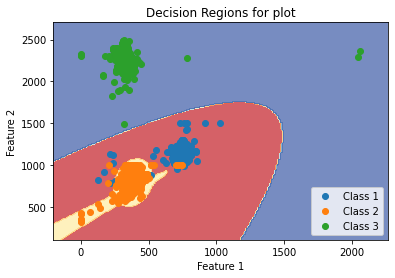

In [77]:
model.plot_decision_regions_2d(f"plot",TrainData)

In [80]:
model.plot_contour(f"plot",TrainData)

AttributeError: 'Bayes_Classifier_GMM' object has no attribute 'plot_contour'